In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [2]:
raw_csv_data = pd.read_csv("/content/Absenteeism-data.csv")

In [3]:
type(raw_csv_data)

pandas.core.frame.DataFrame

In [4]:
df = raw_csv_data.copy()

In [5]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = 5
# display(df)
# df.info()

In [6]:
df = df.drop(['ID'], axis = 1)

In [7]:
########## 'Reason for Absence' ##################
##################################################
df['Reason for Absence'].min()
df['Reason for Absence'].max()
pd.unique(df['Reason for Absence'])
df['Reason for Absence'].unique()
len(df['Reason for Absence'].unique())
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [8]:
########## '.get_dummies()' ######################
##################################################
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

#reason_columns['check'] = reason_columns.sum(axis=0)
#reason_columns
#reason_columns['check'].sum(axis=0)
#reason_columns['check'].unique()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [12]:
# df.columns.values
# reason_columns.columns.values
#df = df.drop(['Reason for Absence'], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [13]:
# reason_columns.loc[:, 1:14].max(axis=1)
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [14]:
########## Concatenate Column Values #############
##################################################
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [15]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [16]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [ ]:
#

In [17]:
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [18]:
########## Create a Checkpoint ###################
##################################################


df_reason_mod = df.copy()
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,True,False,False,1
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,True,False,False,1
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,True,False,False,1
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,False,False,False,True


In [19]:
########## 'Date' ################################
##################################################


#df_reason_mod['Date']
# df_reason_mod['Date'][0]
# type(df_reason_mod['Date'][0])

df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
# df_reason_mod['Date']
# type(df_reason_mod['Date'])
# df_reason_mod.info()


In [20]:
df_reason_mod['Date']

,Date
0,2015-07-07
1,2015-07-14
2,2015-07-15
3,2015-07-16
4,2015-07-23
...,...
695,2018-05-23
696,2018-05-23
697,2018-05-24
698,2018-05-24


In [21]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [22]:
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d-%m-%Y')
df_reason_mod['Date']

,Date
0,2015-07-07
1,2015-07-14
2,2015-07-15
3,2015-07-16
4,2015-07-23
...,...
695,2018-05-23
696,2018-05-23
697,2018-05-24
698,2018-05-24


In [24]:
 df_reason_mod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       700 non-null    datetime64[ns]
 1   Transportation Expense     700 non-null    int64         
 2   Distance to Work           700 non-null    int64         
 3   Age                        700 non-null    int64         
 4   Daily Work Load Average    700 non-null    float64       
 5   Body Mass Index            700 non-null    int64         
 6   Education                  700 non-null    int64         
 7   Children                   700 non-null    int64         
 8   Pets                       700 non-null    int64         
 9   Absenteeism Time in Hours  700 non-null    int64         
 10  Reason_1                   700 non-null    bool          
 11  Reason_2                   700 non-null    bool          
 12  Reason_3

In [32]:
########## Extract the Month Value ###############
##################################################
df_reason_mod['Date'][0]
df_reason_mod['Date'][0].month
list_months = []
list_months

df_reason_mod.shape


(700, 14)

In [33]:
for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)

In [37]:
list_months
len(list_months)
df_reason_mod['Month Value'] = list_months
df_reason_mod.head(10)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7
5,2015-07-10,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7
6,2015-07-17,361,52,28,239.554,27,1,1,4,8,False,False,False,True,7
7,2015-07-24,260,50,36,239.554,23,1,4,0,4,False,False,False,True,7
8,2015-07-06,155,12,34,239.554,25,1,2,0,40,False,False,True,1,7
9,2015-07-13,235,11,37,239.554,29,3,1,1,8,False,False,False,True,7


In [39]:
df_reason_mod.tail(5)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value
695,2018-05-23,179,22,40,237.656,22,2,2,0,8,True,False,False,1,5
696,2018-05-23,225,26,28,237.656,24,1,1,2,3,True,False,False,1,5
697,2018-05-24,330,16,28,237.656,25,2,0,0,8,True,False,False,1,5
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,False,False,False,True,5
699,2018-05-31,291,31,40,237.656,25,1,1,1,2,False,False,False,True,5


In [38]:
 df_reason_mod['Date'][699].weekday()

3

In [41]:
 df_reason_mod['Date'][699]


Timestamp('2018-05-31 00:00:00')

In [42]:
 def date_to_weekday(date_value):
    return date_value.weekday()

In [43]:
 df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [44]:
 df_reason_mod.head(5)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [45]:
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)
df_reason_mod.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [46]:
df_reason_mod.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
       'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week'], dtype=object)

In [47]:
 column_names_upd = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [48]:
 df_reason_mod = df_reason_mod[column_names_upd]
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,1,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,1,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,1,2,1,2


In [51]:
 df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,1,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,1,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,1,2,1,2


In [52]:
print(type(df_reason_date_mod['Transportation Expense'][0]))
print(type(df_reason_date_mod['Distance to Work'][0]))
print(type(df_reason_date_mod['Age'][0]))
print(type(df_reason_date_mod['Daily Work Load Average'][0]))
print(type(df_reason_date_mod['Body Mass Index'][0]))


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [53]:
df_reason_date_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,1,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,1,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,1,2,1,2


In [56]:
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].value_counts()

array([1, 3, 2, 4])

In [57]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})


In [59]:
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].value_counts()

,count
Education,
0,583
1,117


In [60]:
df_cleaned = df_reason_date_mod.copy()
df_cleaned.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,0,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,0,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,0,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,0,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,0,2,1,2
5,False,False,False,True,7,4,179,51,38,239.554,31,0,0,0,2
6,False,False,False,True,7,4,361,52,28,239.554,27,0,1,4,8
7,False,False,False,True,7,4,260,50,36,239.554,23,0,4,0,4
8,False,False,True,1,7,0,155,12,34,239.554,25,0,2,0,40
9,False,False,False,True,7,0,235,11,37,239.554,29,1,1,1,8


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
 # Set the aesthetic style of the plots
 #sns.set_style('whitegrid')
 # Create a figure with a specific size
 #plt.figure(figsize=(10, 6))

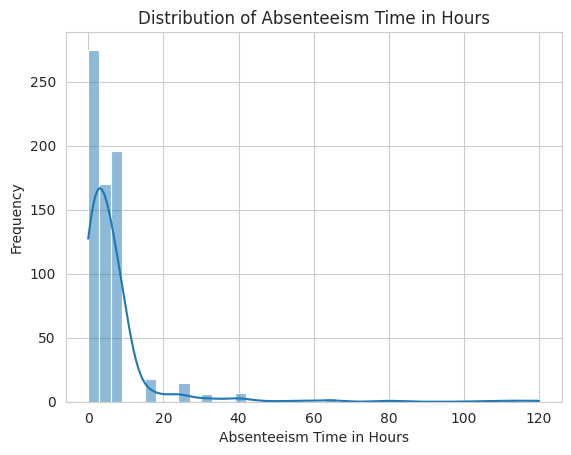

In [72]:
sns.histplot(df_cleaned['Absenteeism Time in Hours'],bins = 40, kde=True)
sns.set_style('whitegrid')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Absenteeism Time in Hours')
plt.show()

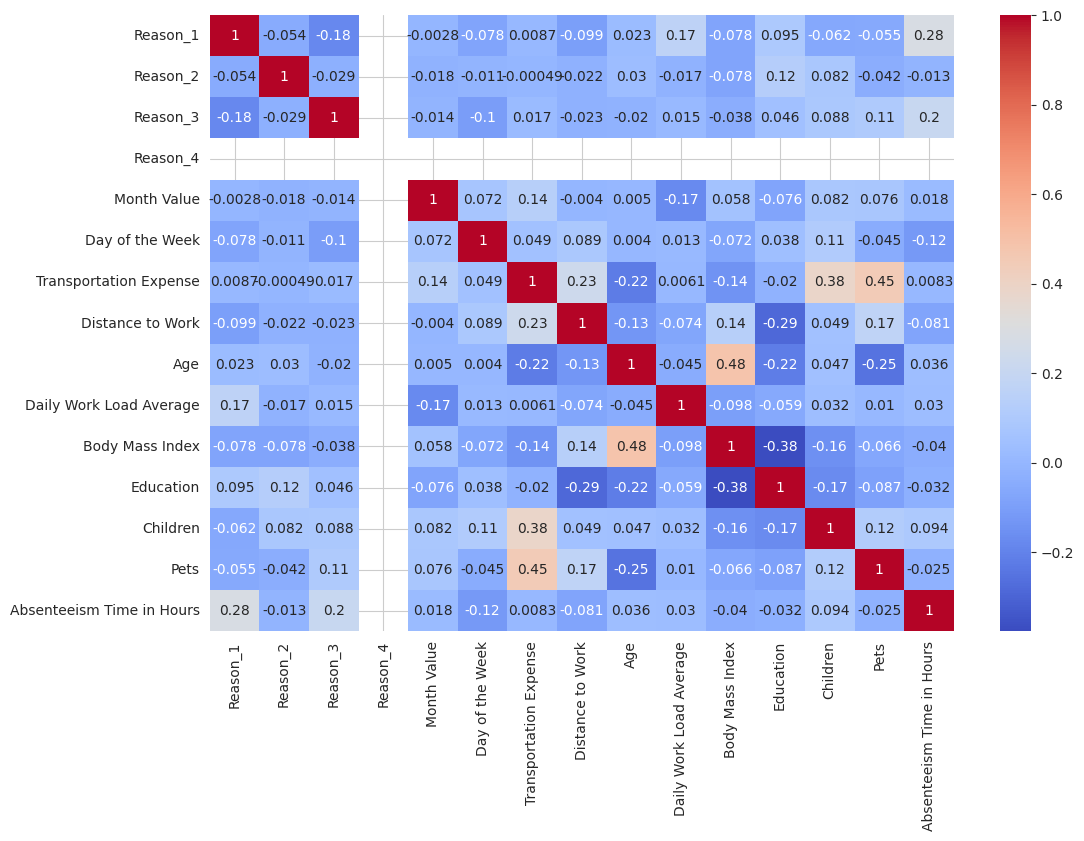

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [86]:
type(df_cleaned['Reason_4'])

pandas.core.series.Series

In [85]:
df_cleaned['Reason_4'].value_counts()

,count
Reason_4,
True,700


In [80]:
df_cleaned.isna().sum()

,0
Reason_1,0
Reason_2,0
Reason_3,0
Reason_4,0
Month Value,0
Day of the Week,0
Transportation Expense,0
Distance to Work,0
Age,0
Daily Work Load Average,0


In [84]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_1                   700 non-null    bool   
 1   Reason_2                   700 non-null    bool   
 2   Reason_3                   700 non-null    bool   
 3   Reason_4                   700 non-null    bool   
 4   Month Value                700 non-null    int64  
 5   Day of the Week            700 non-null    int64  
 6   Transportation Expense     700 non-null    int64  
 7   Distance to Work           700 non-null    int64  
 8   Age                        700 non-null    int64  
 9   Daily Work Load Average    700 non-null    float64
 10  Body Mass Index            700 non-null    int64  
 11  Education                  700 non-null    int64  
 12  Children                   700 non-null    int64  
 13  Pets                       700 non-null    int64  

In [82]:
df_cleaned['Reason_4'] = df_cleaned['Reason_4'].astype(bool)

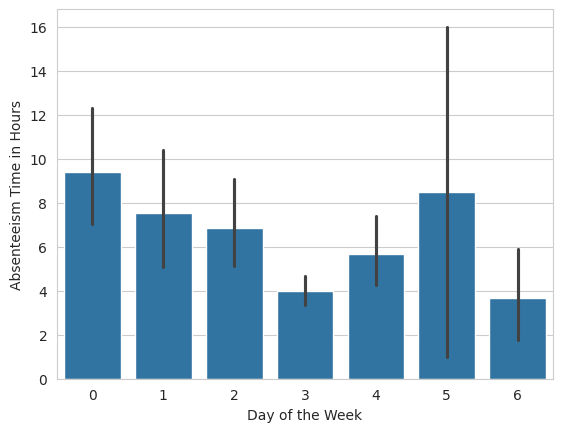

In [88]:
sns.barplot(x='Day of the Week', y='Absenteeism Time in Hours', data=df_cleaned)
plt.show()

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

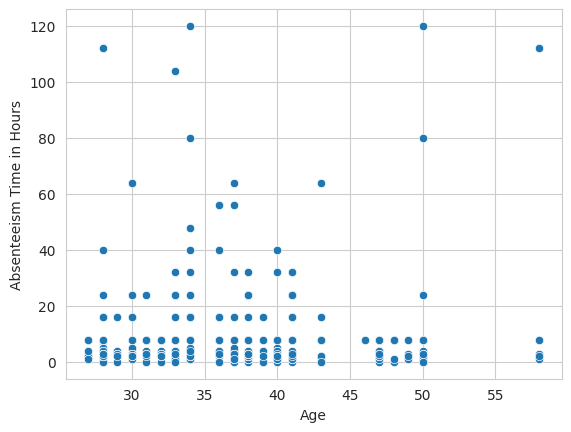

In [89]:
sns.scatterplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

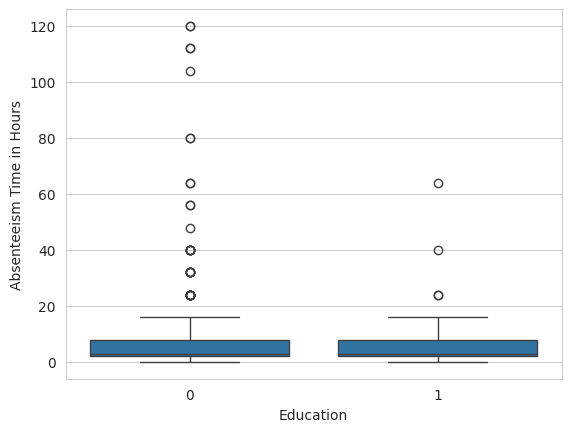

In [90]:
sns.boxplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Month Value', ylabel='Absenteeism Time in Hours'>

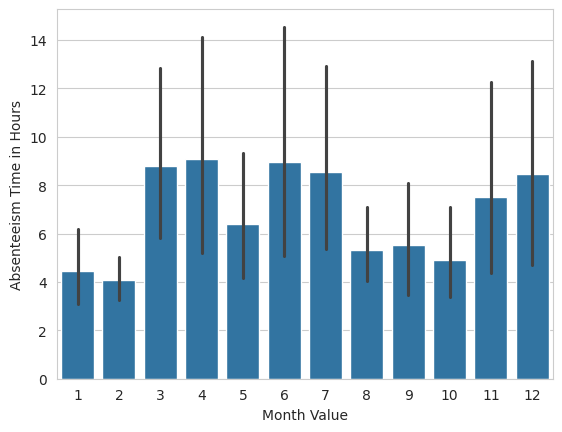

In [91]:
sns.barplot(x='Month Value', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Distance to Work', ylabel='Absenteeism Time in Hours'>

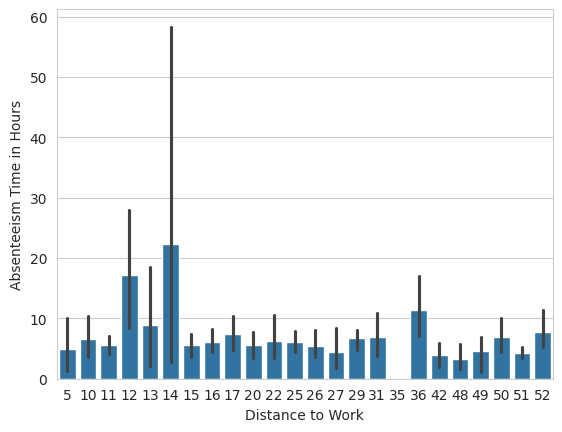

In [93]:
sns.barplot(x='Distance to Work', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

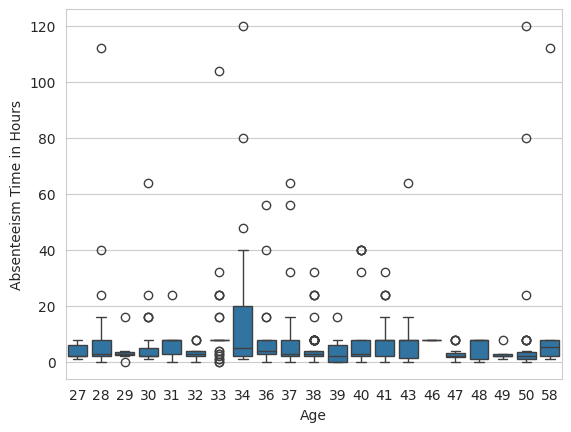

In [95]:
sns.boxplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='count'>

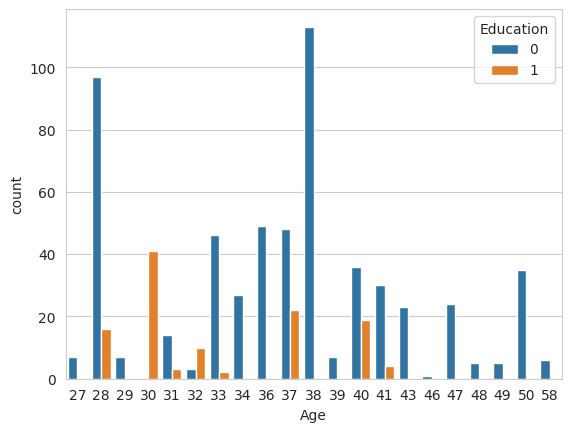

In [98]:
sns.countplot(x='Age', data=df_cleaned, hue='Education')

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

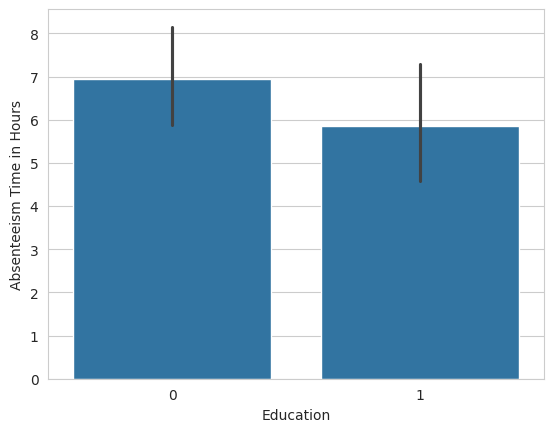

In [99]:
sns.barplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Distance to Work', ylabel='Reason_1'>

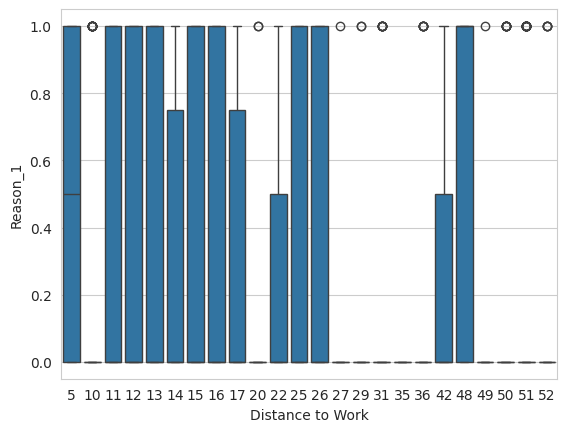

In [104]:
sns.boxplot(x="Distance to Work", y = 'Reason_1',data=df_cleaned)

In [109]:
monthly_absenteeism = df_cleaned.groupby('Month Value')['Absenteeism Time in Hours'].mean().reset_index()
monthly_absenteeism

,Month Value,Absenteeism Time in Hours
0,1,4.440000
1,2,4.083333
2,3,8.793103
3,4,9.094340
4,5,6.396552
5,6,8.942857
6,7,8.545455
7,8,5.333333
8,9,5.509434
9,10,4.915493


<Axes: xlabel='Month Value', ylabel='Absenteeism Time in Hours'>

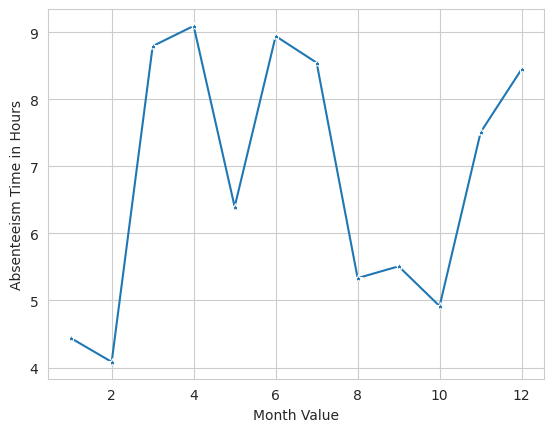

In [114]:
sns.lineplot(x='Month Value', y='Absenteeism Time in Hours', data=monthly_absenteeism, marker='*')

In [111]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_1                   700 non-null    bool   
 1   Reason_2                   700 non-null    bool   
 2   Reason_3                   700 non-null    bool   
 3   Reason_4                   700 non-null    bool   
 4   Month Value                700 non-null    int64  
 5   Day of the Week            700 non-null    int64  
 6   Transportation Expense     700 non-null    int64  
 7   Distance to Work           700 non-null    int64  
 8   Age                        700 non-null    int64  
 9   Daily Work Load Average    700 non-null    float64
 10  Body Mass Index            700 non-null    int64  
 11  Education                  700 non-null    int64  
 12  Children                   700 non-null    int64  
 13  Pets                       700 non-null    int64  

<Axes: xlabel='Day of the Week', ylabel='Absenteeism Time in Hours'>

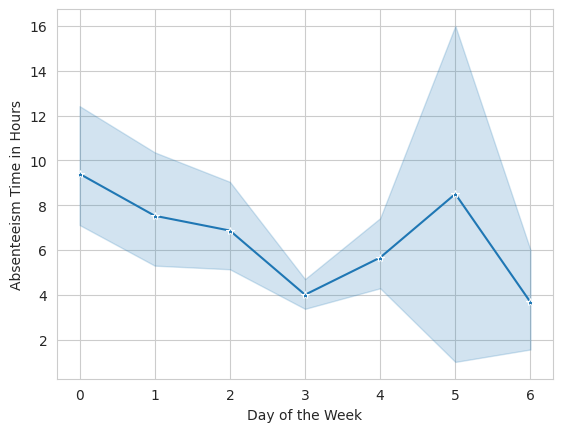

In [115]:
sns.lineplot(x='Day of the Week', y='Absenteeism Time in Hours', data=df_cleaned, marker='*')

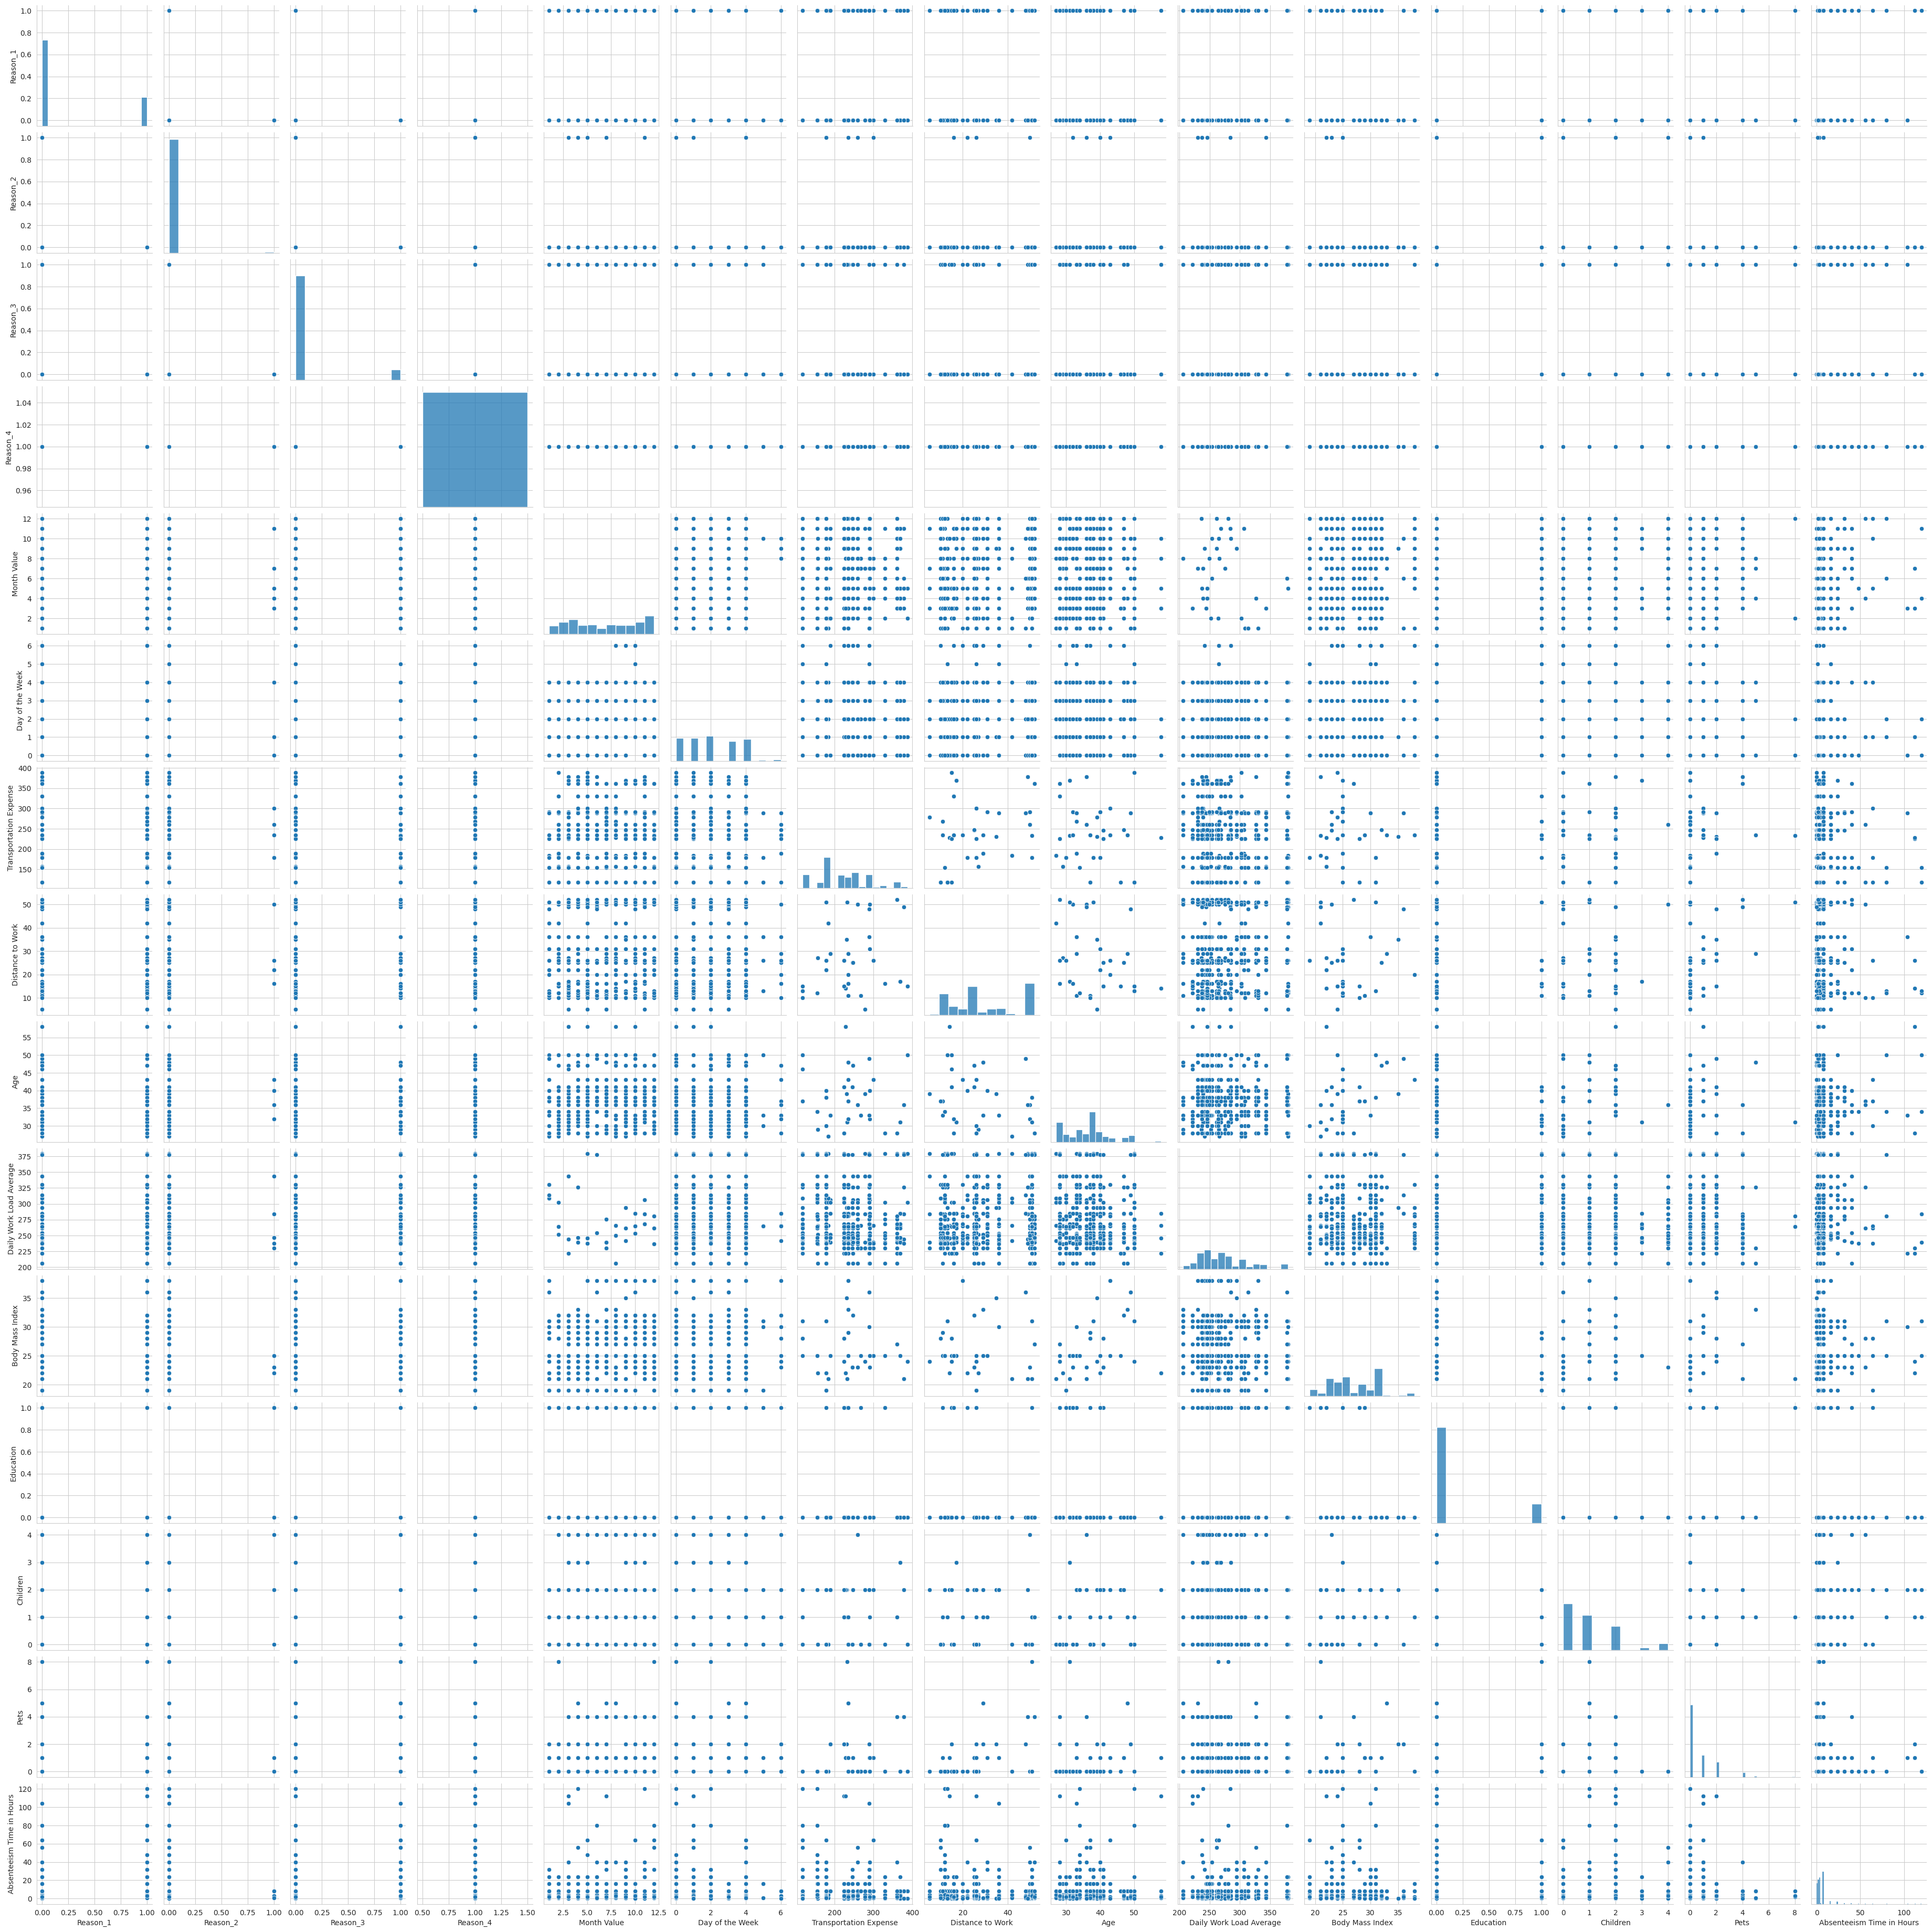

In [116]:
sns.pairplot(df_cleaned)

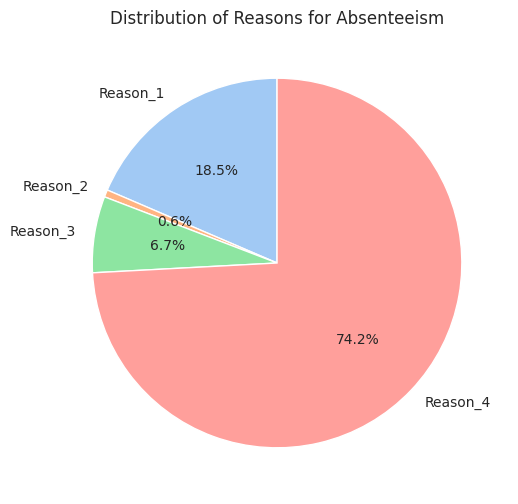

In [120]:
reason_counts = df_cleaned[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].sum()
labels = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
plt.figure(figsize=(10, 6))
plt.pie(reason_counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title('Distribution of Reasons for Absenteeism')
plt.show()


<Axes: xlabel='Reason_1', ylabel='Absenteeism Time in Hours'>

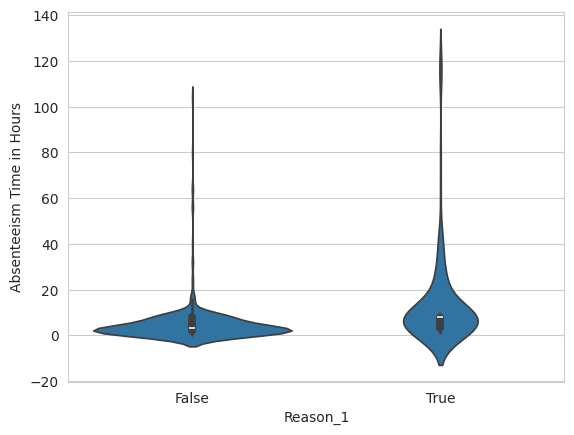

In [121]:
sns.violinplot(x='Reason_1', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

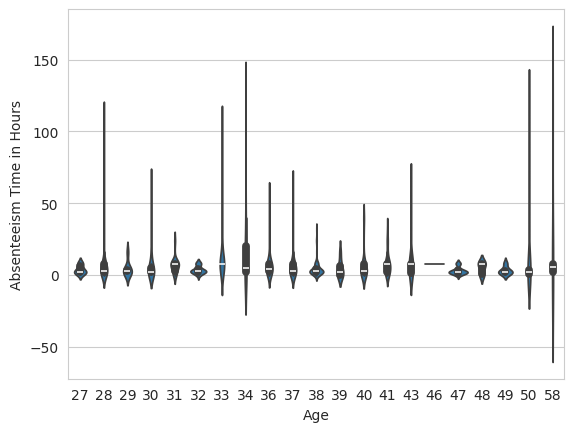

In [122]:
sns.violinplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)